# Section 4 - PCA
You do not need any accompanying datasets for this notebook.

Goals:
- practice pandas
- make interpretation from plots
- solidify linear regression
- understand SVD better

In [1]:
# Axis = 0 vs 1
import numpy as np

# Create a 2D numpy array
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print("Original array:")
print(arr)

# Sum along axis=0 (down the rows / vertically)
sum_axis0 = np.sum(arr, axis=0)
print("\nSum along axis=0:")
print(sum_axis0)

# Sum along axis=1 (across the columns / horizontally)
sum_axis1 = np.sum(arr, axis=1)
print("\nSum along axis=1:")
print(sum_axis1)

Original array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Sum along axis=0:
[12 15 18]

Sum along axis=1:
[ 6 15 24]


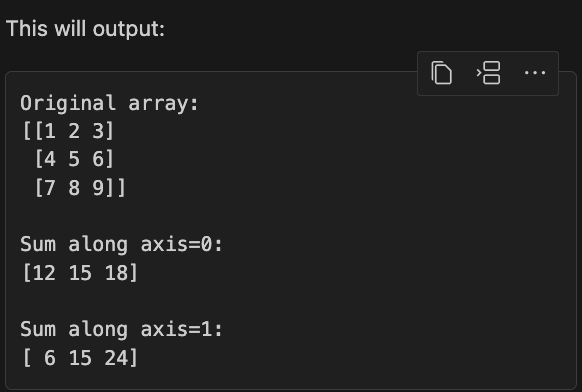

# 1 Loading data from internet/preprocessing
**Task:**
- Read the description of the [diabetes](https://www4.stat.ncsu.edu/~boos/var.select/diabetes) dataset. 
- Using [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), load the dataset into a DataFrame `df` from the URL https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt. 
    - This dataset is tab separated, so make sure you use the read_csv function's sep argument correctly with '\t'.
- Display the dataframe.

In [2]:
# TODO import data

import pandas as pd
import numpy as np
url = 'https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt'
data = pd.read_csv(url, sep='\t')
display(data.head())
print(data.shape)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


(442, 11)


We will analyze the data for individuals with
1. `20 <= AGE < 30`
2. `SEX == 1`

**Task:** 
- Store this subset of data (with above two criteria) as `subdata`. 
    - After filtering the above criteria, drop the `AGE` and `SEX` columns from the data. Hint: use subdata.drop(columns= ...).
    - Display `subdata` to check you did the right thing.
- Define numpy array `y` by choosing the corresponding column of `subdata`.
- Define numpy array `X` by choosing the remaining columns of `subdata`. 
    - Hence, your predictors/features are `BMI`, `BP`, `S1`, `S2`, `S3`, `S4`, `S5`, and `S6`. (Remember: we already dropped `SEX` and `AGE`)
    - Make sure the dimensions are number of features by number of data points. You may need to take a transpose.
- Check if you did the correct thing by printing any relevatn quantities, like shapes or array entries.

In [3]:
# TODO create subdata, y, and X

subdata = data[(data['AGE'] >= 20) & (data['AGE'] < 30) & (data['SEX'] == 1)]
subdata = subdata.drop(columns=['AGE', 'SEX'])
print(subdata.shape)
display(subdata.head())
subdata_numpy = subdata.values
y = np.array(subdata_numpy[:, -1])
X = np.array(subdata_numpy[:, :-1])
y = y.reshape(-1, 1)
print(y.shape)
print(X.shape)
# print(X)


(27, 9)


,BMI,BP,S1,S2,S3,S4,S5,S6,Y
3,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
5,22.6,89.0,139,64.8,61.0,2.0,4.1897,68,97
9,30.0,85.0,180,93.4,43.0,4.0,5.3845,88,310
10,18.6,97.0,114,57.6,46.0,2.0,3.9512,83,101
22,26.0,92.0,187,120.4,56.0,3.0,3.9703,88,68


(27, 1)
(27, 8)


# 2 Covariance matrix 

**Task:**
- Discuss: What is one important step you must do to the data before calculating covariance matrix for PCA?

    **Ans:** 

- Perform that change on the data X above, store the centered data as `X_ctd`. 
- Then, compute the new covariance matrix `C` of the data `X_ctd` using the formula
    $$
    C = \frac{1}{n\!-\!1}\ X X^T.
    $$
    - Check the dimensions of the covariance matrix is correct.
- Perform an eigendecomposition, using singular value decomposition.

In [4]:
from sklearn.decomposition import PCA
# TODO compute covariance matrix
X_ctd = X - X.mean(axis=0, keepdims=True)
print(X_ctd.shape)
print(X_ctd.shape[0])
C = X_ctd.T @ X_ctd / (X_ctd.shape[0] - 1)
# TODO eigendecomposition
U, S, V = np.linalg.svd(C)
print(U.shape)
print(S.shape)    
print(V.shape)
print(S)

(27, 8)
27
(8, 8)
(8,)
(8, 8)
[1.47690407e+03 1.10802577e+02 6.44404206e+01 4.03704105e+01
 1.73158735e+01 5.68894904e+00 5.73229400e-02 9.65230624e-03]


# 3 Compare eigendecompositions
**Task:**
- Compute the eigen decomposition of the covariance matrix THREE different ways: `svd()`, `eig()`, `eigh()`. 
    - For each way, print the eigenvalues/singular values.
- Disucss:
    - What's the difference between `svd` and `eig`? How many different outputs are there?
    - svd produces U, S, V. U is the eigenvectors of $XX^T$, S is the singular values, and V is the eigenvectors of $X^TX$.
    - eig produces the eigenvalues and eigenvectors of C.
    - What's the difference between `eig` and `eigh`? What property of covariance matrices allows us to use `eigh`?
    - 
    - What is the difference between the eigenvalue/singular value outputs? How are they sorted? Print them and check.

In [5]:
# TODO SVD
U, S, V = np.linalg.svd(C)
print(S)
print(S.shape)
# There should be 8 eigenvalues

[1.47690407e+03 1.10802577e+02 6.44404206e+01 4.03704105e+01
 1.73158735e+01 5.68894904e+00 5.73229400e-02 9.65230624e-03]
(8,)


- eig: This function can be used for any square matrix. It computes the eigenvalues and eigenvectors without making any assumptions about the properties of the matrix

In [6]:
# Compute eigen decomposition using eig()
print(C.shape)
eigenvalues, eigenvectors = np.linalg.eig(C)
print(eigenvalues)


(8, 8)
[1.47690407e+03 1.10802577e+02 6.44404206e+01 4.03704105e+01
 1.73158735e+01 5.68894904e+00 5.73229400e-02 9.65230624e-03]


- eigh: This function is specifically designed for Hermitian (or real symmetric) matrices. A Hermitian matrix is a complex square matrix that is equal to its own conjugate transpose. In the context of real-valued matrices, this reduces to symmetric matrices, which are equal to their own transpos
- orders eigenvalues from smallest to largest

In [7]:
# TODO EIGH
# Compute eigen decomposition using eigh()
eigenvalues_eigh, eigenvectors_eigh = np.linalg.eigh(C)
print(eigenvalues_eigh)

[9.65230624e-03 5.73229400e-02 5.68894904e+00 1.73158735e+01
 4.03704105e+01 6.44404206e+01 1.10802577e+02 1.47690407e+03]


# sklearn PCA
**Task:**
Compare your manual implementation against sklearn.

In [8]:
# TODO sklearn PCA
from sklearn.decomposition import PCA
print('X shape:',X.shape)   
sklearn_pca = PCA()
sklearn_pca.fit(X)

eigenvalues_sklearn = sklearn_pca.explained_variance_
eigenvectors_sklearn = sklearn_pca.components_
print(eigenvalues_sklearn)
print('eigenvectors:',eigenvectors_sklearn.shape)
eigenvectors_sklearn = eigenvectors_sklearn.T # eigenvectors are in columns




# TODO compare eigenvalues

X shape: (27, 8)
[1.47690407e+03 1.10802577e+02 6.44404206e+01 4.03704105e+01
 1.73158735e+01 5.68894904e+00 5.73229400e-02 9.65230624e-03]
eigenvectors: (8, 8)


# 5 Projection
For simplicity, consider a further subdata in 2D using only the `BMI` and `BP` columns, centered. The code has been written for you.

**Task:**
Read and understand every line of code below.

**Discuss:** Let $U_1$ be the first column of $U$, hence, the first principal component. Why does the formula 
$$
U_1 U_1^T Z
$$
give the projection of the data on the first principal component?  
(Hint: Break it down into steps. First, what are the dimensions of $U_1^T Z$ and what does each entry mean? Second, what does multiplying it further by $U_1$ do?)

X shape: (27, 8)
Z shape:  (27, 2)
eigenvalues: [76.83039001 12.81595101]
eigenvecs:  [[-0.25406279 -0.96718773]
 [-0.96718773  0.25406279]]
eigenvalues as W [76.83039001 12.81595101]
U shape (27, 27)
Z shape (27, 2)
V shape (2, 2)
V matrix: [[-0.25406279  0.96718773]
 [-0.96718773 -0.25406279]]
eigenvecs:  [[-0.25406279 -0.96718773]
 [-0.96718773  0.25406279]]


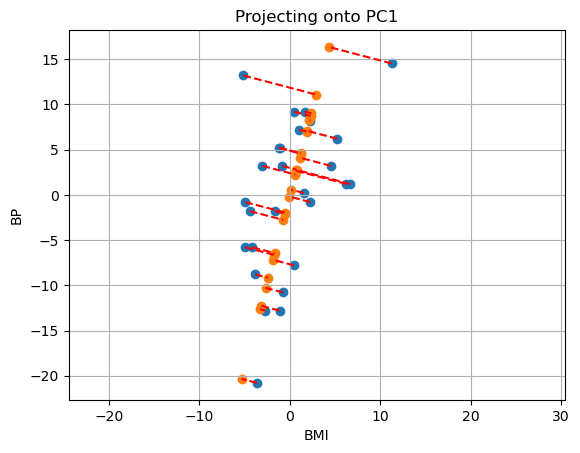

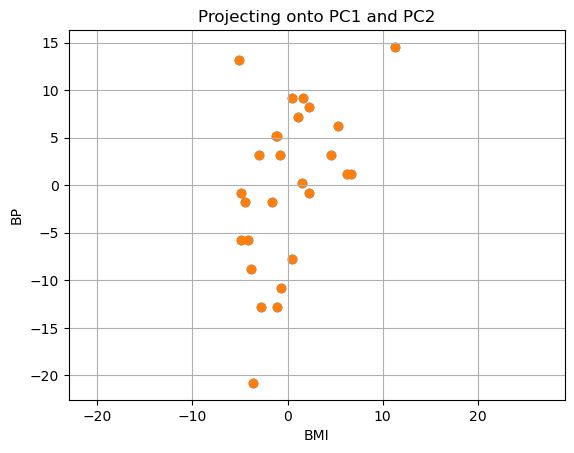

In [9]:
from sklearn.decomposition import PCA

print ('X shape:',X.shape)
n = X.shape[1] # obs x features

Z = X[:,:2]                                 # keep first two rows for BMI and BP only
Z -= Z.mean(axis=0, keepdims=True)          # center by subtracting mean from each data point in each row

print('Z shape: ',Z.shape)

pca = PCA()
pca.fit(Z)
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_.T
print('eigenvalues:',eigenvalues)
print("eigenvecs: ",eigenvectors)

U, W, V= np.linalg.svd(Z)    # svd
W = np.square(W) / (Z.shape[0] - 1)
print("eigenvalues as W",W)


print('U shape',U.shape)
print('Z shape',Z.shape)
print('V shape',V.shape)
# print("U matrix:",U)
print("V matrix:",V.T)
print("eigenvecs: ",eigenvectors)
# why are V and eigenvectors different?
V = V.T # eigenvectors are in columns
PC1 = Z @ V[:,0] # project onto PC1
# 27x2 * 2x1 = 27x1
# print(PC1)
# print('PC1',PC1.shape)
# print('V[:,0]',V[:,0].T.shape)
P1 = np.outer(PC1, V[:,0]) # project back to original space

PC12 = Z @ V[:,:2] # project onto PC1 and PC2
# 27x2 * 2x2 = 27x2

P12 = PC12 @ V[:,:2].T # project back to original space



import matplotlib.pyplot as plt
plt.scatter(Z[:,0], Z[:,1])
plt.scatter(P1[:,0], P1[:,1])
plt.plot(np.vstack((Z[:,0], P1[:,0])), np.vstack((Z[:,1], P1[:,1])), '--r')
plt.xlabel('BMI'); plt.ylabel('BP'); plt.title('Projecting onto PC1')
plt.axis('equal'); plt.grid(); plt.show()

plt.scatter(Z[:,0], Z[:,1])
plt.scatter(P12[:,0], P12[:,1])
plt.plot(np.vstack((Z[:,0], P12[:,0])), np.vstack((Z[:,1], P12[:,1])), '--r')
plt.xlabel('BMI'); plt.ylabel('BP'); plt.title('Projecting onto PC1 and PC2')
plt.axis('equal'); plt.grid(); plt.show()
